<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [9]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from spacy.lang.en.stop_words import STOP_WORDS

import regex as re
import spacy
#import nltk

## Load data

In [10]:
## Loading the data

input_file = '/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Labs/DATA/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [11]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [12]:
# ANSWER
text = re.sub(r'[="]', '', text)
print(text[:1000])

USS Enterprise (NCC-1701-D)

For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

History
Construction and launch
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was the site of

## Helper method

In [13]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [18]:
import spacy

In [19]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_sm")

# process the text
doc = nlp(text)

## Tokenise

In [20]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| 'For'
10| 'five'
11| 'hundred'
12| 'years'
13| ','
14| 'every'
15| 'ship'
16| 'that'
17| 'has'
18| 'borne'
19| 'the'
20| 'name'
21| 'of'
22| 'the'
23| 'Enterprise'
24| 'has'
25| 'become'
26| 'a'
27| 'legend'
28| '.'


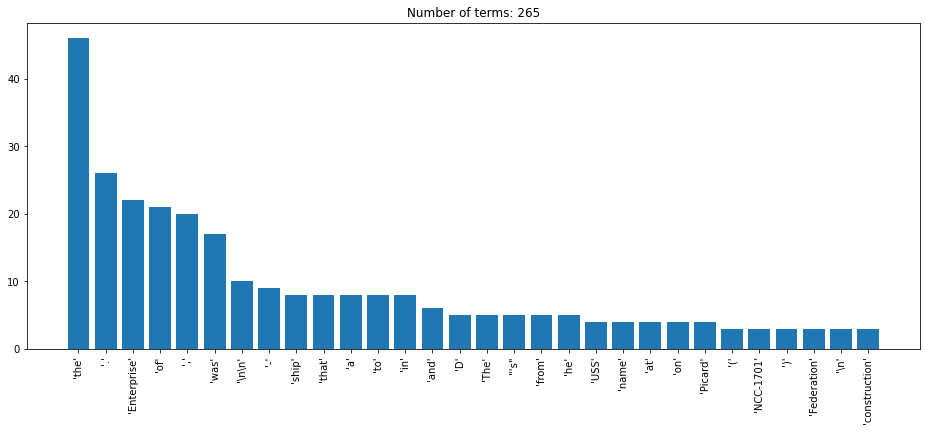

In [21]:
# ANSWER
plot_words(['%r' % t.text for t in doc])

### Stop Words

In [22]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| 'For'           ''
10| 'five'          ''
11| 'hundred'       ''
12| 'years'         'years'
13| ','             ','
14| 'every'         ''
15| 'ship'          'ship'
16| 'that'          ''
17| 'has'           ''
18| 'borne'         'borne'
19| 'the'           ''
20| 'name'          ''
21| 'of'            ''
22| 'the'           ''
23| 'Enterprise'    'Enterprise'
24| 'has'           ''
25| 'become'        ''
26| 'a'             ''
27| 'legend'        'legend'
28| '.'             '.'


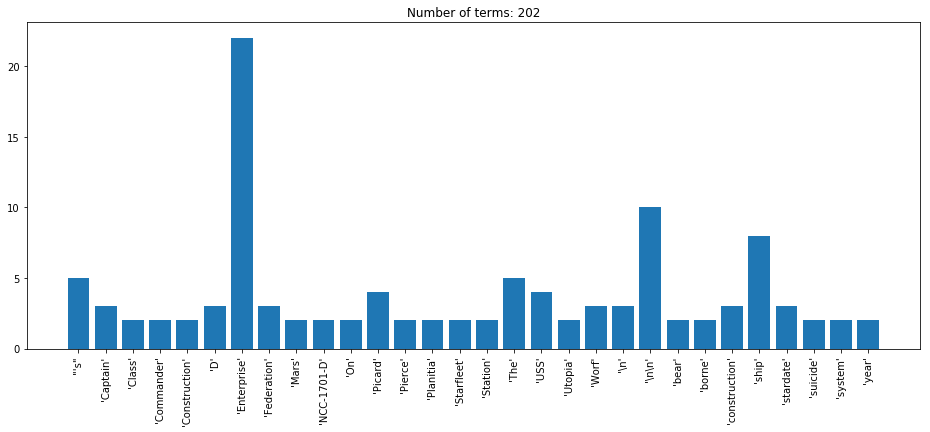

In [ ]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [23]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'For'        : ADP   IN
10|'five'       : NUM   CD
11|'hundred'    : NUM   CD
12|'years'      : NOUN  NNS
13|','          : PUNCT ,
14|'every'      : DET   DT
15|'ship'       : NOUN  NN
16|'that'       : DET   WDT
17|'has'        : AUX   VBZ
18|'borne'      : VERB  VBN
19|'the'        : DET   DT
20|'name'       : NOUN  NN
21|'of'         : ADP   IN
22|'the'        : DET   DT
23|'Enterprise' : NOUN  NN
24|'has'        : AUX   VBZ
25|'become'     : VERB  VBN
26|'a'          : DET   DT
27|'legend'     : NOUN  NN
28|'.'          : PUNCT .


### Lemmatisation

In [24]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| 'For'        'for'
10| 'five'       'five'
11| 'hundred'    'hundred'
12| 'years'      'year'
13| ','          ','
14| 'every'      'every'
15| 'ship'       'ship'
16| 'that'       'that'
17| 'has'        'have'
18| 'borne'      'bear'
19| 'the'        'the'
20| 'name'       'name'
21| 'of'         'of'
22| 'the'        'the'
23| 'Enterprise' 'enterprise'
24| 'has'        'have'
25| 'become'     'become'
26| 'a'          'a'
27| 'legend'     'legend'
28| '.'          '.'


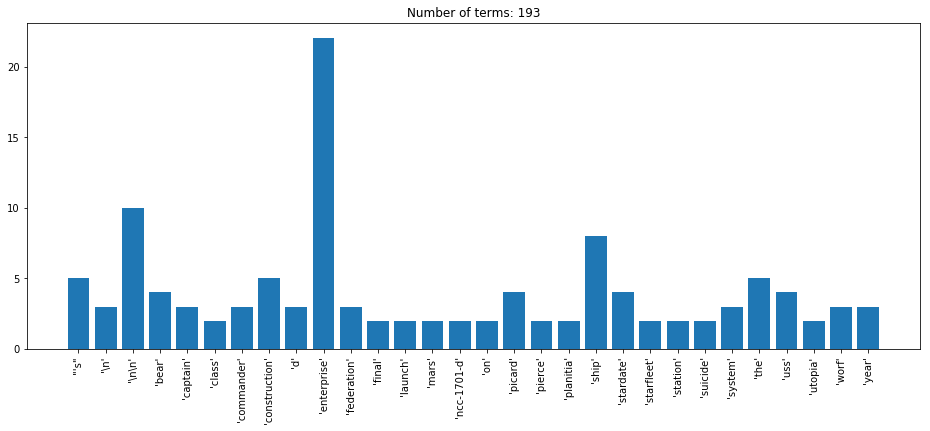

In [ ]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [ ]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)
 1: For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
 2: This one is no different.
 3: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
GPE        : United Federation of Planets Galaxy
ORG        : Starfleet
ORDINAL    : fifth
PRODUCT    : Federation
 4: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Federation
 5: The Enterprise was destroyed during the Battle of Veridian III in 2371.
-------------------------

## Extra: Using NLTK for NLP

### Tokenise

In [ ]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'For'
 7| 'five'
 8| 'hundred'
 9| 'years'
10| ','
11| 'every'
12| 'ship'
13| 'that'
14| 'has'
15| 'borne'
16| 'the'
17| 'name'
18| 'of'
19| 'the'
20| 'Enterprise'
21| 'has'
22| 'become'
23| 'a'
24| 'legend'
25| '.'


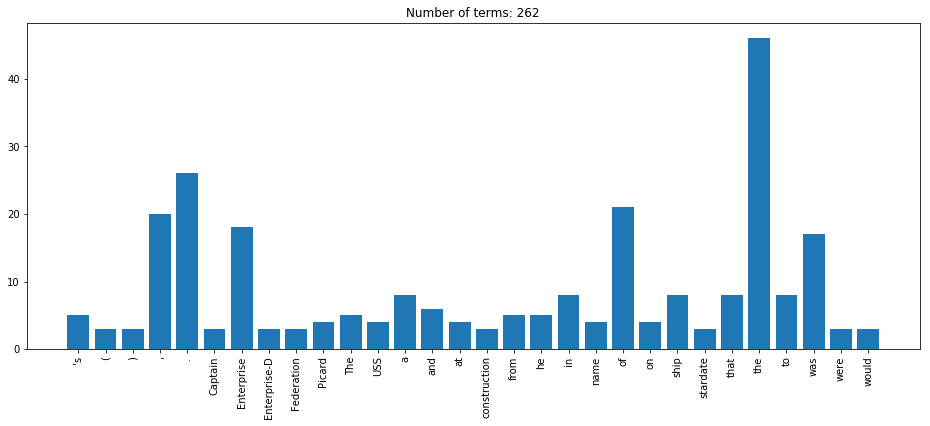

In [ ]:
plot_words(tokens)

### Stop words

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk 

In [28]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [33]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = '' # create a list of tokens withOUT the stop words 

In [47]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

In [50]:
# Create plot of words without stopword
# ANSWER
# plot_words(tokens_no_stop)

### Check Part of Speech

In [35]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [36]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

NameError: name 'tokens' is not defined

### Stemming

In [37]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/winifredwetthasinghe/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [40]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [41]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


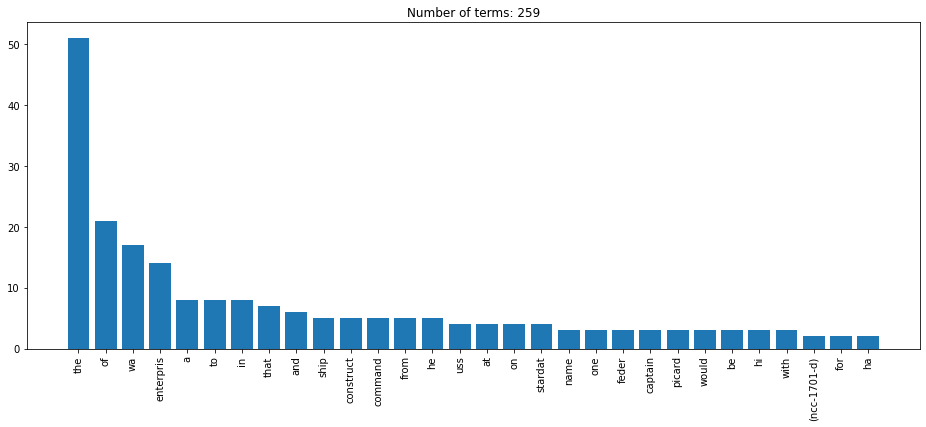

In [42]:
plot_words(stemmed.split())

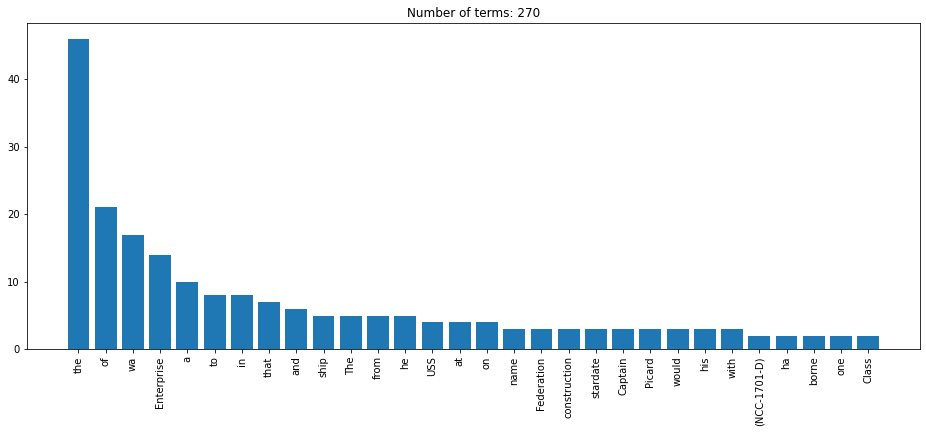

In [43]:
plot_words(lemma.split())

### Entity recognition

In [45]:
# ## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



